This notebook uses what was shown in the previous one. The goal is represent all the temperature data corresponding to a given month, in this case July 2015

In [1]:
year = 2015
month = 7

In [12]:
%matplotlib inline
import glob
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib  import colors

The directory where we store the data files:

In [3]:
basedir = "/home/ctroupin/DataOceano/MyOcean/INSITU_GLO_NRT_OBSERVATIONS_013_030/monthly/" + str(year) + str(month).zfill(2) + '/'

# 1. Simple plot

# 1.1 Configuration

We start by defining some options for the scatter plot:
* the range of temperature that will be shown;
* the colormap;
* the *ticks* to be put on the colorbar.

In [9]:
tempmin, tempmax = 5., 30.
cmaptemp = plt.cm.RdYlBu_r
normtemp = colors.Normalize(vmin=tempmin, vmax=tempmax)
tempticks = np.arange(tempmin, tempmax+0.1,2.5)

# 1.2 Loop on the files

We create a loop on the netCDF files located in our directory. Longitude, latitude and dept are read from every file, while the temperature is not always available. For the plot, we only take the data with have a depth dimension equal to 1.

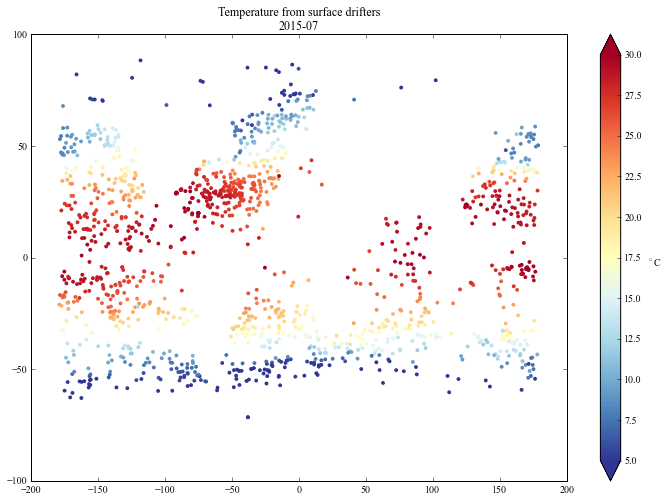

In [37]:
fig = plt.figure(figsize=(12, 8))

nfiles_notemp = 0
filelist = sorted(glob.glob(basedir+'*.nc'))
for datafiles in filelist:

    with netCDF4.Dataset(datafiles) as nc:
        lon = nc.variables['LONGITUDE'][:]
        lat = nc.variables['LATITUDE'][:]
        depth = nc.variables['DEPH'][:]

        try:
            temperature = nc.variables['TEMP'][:,0]

            if(depth.shape[1] == 1):

                scat = plt.scatter(lon.mean(), lat.mean(), s=15., c=temperature.mean(), edgecolor='None', 
                                   cmap=cmaptemp, norm=normtemp)

        except KeyError:
            # print 'No variable temperature in this file'
            #temperature = np.nan*np.ones_like(lat)
            nfiles_notemp+=1
            
# Add colorbar and title
cbar = plt.colorbar(scat, extend='both')
cbar.set_label('$^{\circ}$C', rotation=0, ha='left')
plt.title('Temperature from surface drifters\n' + str(year) + '-' + str(month).zfill(2))
plt.show()

We also counted how many files don't have the temperature variable:

In [27]:
print 'Number of files: ' + str(len(filelist))
print 'Number of files without temperature: ' + str(nfiles_notemp)

Number of files: 2571
Number of files without temperature: 116


# 2. Plot on a map

# 2.1 Configuration of the projection

We choose a Robin projection centered on 0ºE, with a cruse ('c') resolution for the coastline.

In [28]:
m = Basemap(projection='moll', lon_0=0, resolution='c')

The rest of the configuration of the plot can be kept as it was.

## 2.2 Loop on the files

We can copy the part of the code used before. We need to add a line for the projection of the coordinates: *lon, lat = m(lon, lat)*. After the loop we can add the coastline and the continents.

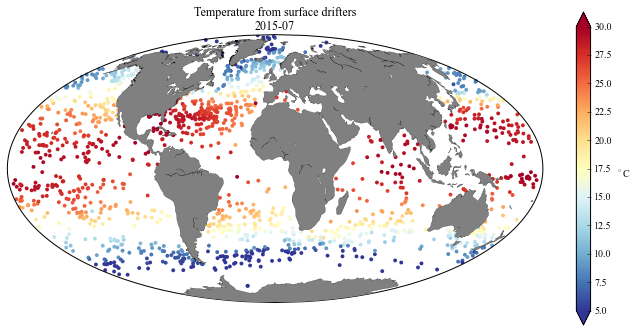

In [36]:
fig = plt.figure(figsize=(12, 8))

nfiles_notemp = 0
filelist = sorted(glob.glob(basedir+'*.nc'))
for datafiles in filelist:

    with netCDF4.Dataset(datafiles) as nc:
        lon = nc.variables['LONGITUDE'][:]
        lat = nc.variables['LATITUDE'][:]
        depth = nc.variables['DEPH'][:]
        
        lon, lat = m(lon, lat)
        try:
            temperature = nc.variables['TEMP'][:,0]

            if(depth.shape[1] == 1):

                scat = m.scatter(lon.mean(), lat.mean(), s=15., c=temperature.mean(), edgecolor='None', 
                                   cmap=cmaptemp, norm=normtemp)

        except KeyError:
            # print 'No variable temperature in this file'
            #temperature = np.nan*np.ones_like(lat)
            nfiles_notemp+=1
            
# Add colorbar and title
cbar = plt.colorbar(scat, extend='both', shrink=0.7)
cbar.set_label('$^{\circ}$C', rotation=0, ha='left')
m.drawcoastlines(linewidth=0.2)
m.fillcontinents(color = 'gray')
plt.title('Temperature from surface drifters\n' + str(year) + '-' + str(month).zfill(2))
plt.show()